# Task 1: Linear Regression to predict house prices based on their square footage and the number of bedrooms and bathrooms.



### Importing all the necessary libraries and modules:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

### Reading the training dataset and preprocessing it:

In [2]:
df_train=pd.read_csv('train.csv')

In [3]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### Factorizing the data to convert categorical columns(Non-numerical columns) into numerical columns:

In [6]:
df_train_new = df_train.copy()
for col in df_train_new.select_dtypes(include=['object']).columns:
    df_train_new[col] = pd.factorize(df_train_new[col])[0]

In [7]:
df_train_new.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,65.0,8450,0,-1,0,0,0,...,0,-1,-1,-1,0,2,2008,0,0,208500
1,2,20,0,80.0,9600,0,-1,0,0,0,...,0,-1,-1,-1,0,5,2007,0,0,181500
2,3,60,0,68.0,11250,0,-1,1,0,0,...,0,-1,-1,-1,0,9,2008,0,0,223500
3,4,70,0,60.0,9550,0,-1,1,0,0,...,0,-1,-1,-1,0,2,2006,0,1,140000
4,5,60,0,84.0,14260,0,-1,1,0,0,...,0,-1,-1,-1,0,12,2008,0,0,250000


In [8]:
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### Replacing NaN(Not a Number) values:

In [9]:
df_train_new.columns[df_train_new.isna().any()]

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

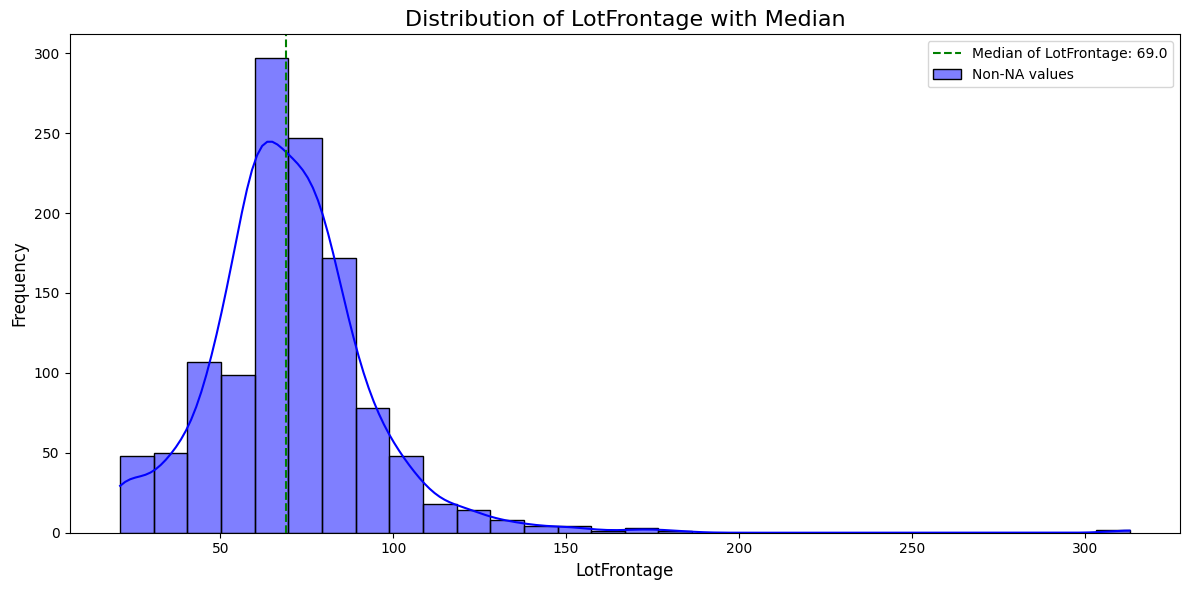

Missing values in LotFrontage: 259


In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(df_train_new['LotFrontage'].dropna(), kde=True, color='blue', label='Non-NA values', bins=30)

median_value = df_train_new['LotFrontage'].median()
plt.axvline(x=median_value, color='green', linestyle='--', label=f'Median of LotFrontage: {median_value}')

plt.title('Distribution of LotFrontage with Median', fontsize=16)
plt.xlabel('LotFrontage', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()
missing_count = df_train_new['LotFrontage'].isna().sum()
print(f"Missing values in LotFrontage: {missing_count}")


In [11]:
df_train_new.corrwith(df_train_new['LotFrontage']).sort_values(ascending=False)

C:\Users\nisar\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\nisar\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


LotFrontage    1.000000
1stFlrSF       0.457181
LotArea        0.426095
GrLivArea      0.402797
TotalBsmtSF    0.392075
                 ...   
Alley         -0.190957
MSZoning      -0.248800
MSSubClass    -0.386347
BldgType      -0.471250
Utilities           NaN
Length: 81, dtype: float64

##### Replacing NaN values in 'LotFrontage' feature column by the median value of the feature since it is not highly dependant on any other feature: 

In [12]:
median_value = df_train_new['LotFrontage'].median()
df_train_new['LotFrontage'] = df_train_new['LotFrontage'].fillna(median_value)

In [13]:
print("Co-relation of GarageYrBlt with other features: ")
print(df_train_new.corrwith(df_train_new['GarageYrBlt']).sort_values(ascending=False))
print("\n")
print("Co-relation of MasVnrArea with other features: ")
print(df_train_new.corrwith(df_train_new['MasVnrArea']).sort_values(ascending=False))

Co-relation of GarageYrBlt with other features: 
GarageYrBlt     1.000000
YearBuilt       0.825667
YearRemodAdd    0.642277
GarageCars      0.588920
GarageArea      0.564567
                  ...   
Exterior2nd    -0.391700
ExterQual      -0.396731
BsmtFinType1   -0.409372
HeatingQC      -0.475529
Foundation     -0.591614
Length: 81, dtype: float64


Co-relation of MasVnrArea with other features: 
MasVnrArea      1.000000
MasVnrType      0.600803
SalePrice       0.477493
OverallQual     0.411876
GrLivArea       0.390857
                  ...   
OverallCond    -0.128101
PavedDrive     -0.141767
BsmtFinType1   -0.148330
HeatingQC      -0.159639
Foundation     -0.211636
Length: 81, dtype: float64


##### GarageYrBlt and MasVnrArea is highly dependant on other features(eg. GarageCars and MasVnrType respectively):

In [14]:
df_train_new['GarageYrBlt']=df_train_new['GarageYrBlt'].fillna(-1) 

In [15]:
df_train_new['MasVnrArea']=df_train_new['MasVnrArea'].fillna(-1) 

### Visualizing co-relation of all the features with the target feature 'SalePrice':

In [16]:
y_corr=df_train_new.corrwith(df_train_new['SalePrice']).values

In [17]:
x_corr=pd.Series(df_train_new.columns).to_numpy()

In [18]:
correlation_df = pd.DataFrame({'Feature': x_corr, 'CorrelationWithSalePrice': y_corr})

In [19]:
correlation_df=correlation_df.sort_values(by='CorrelationWithSalePrice',ascending=False)
correlation_df=correlation_df[abs(correlation_df['CorrelationWithSalePrice'])>0.3]

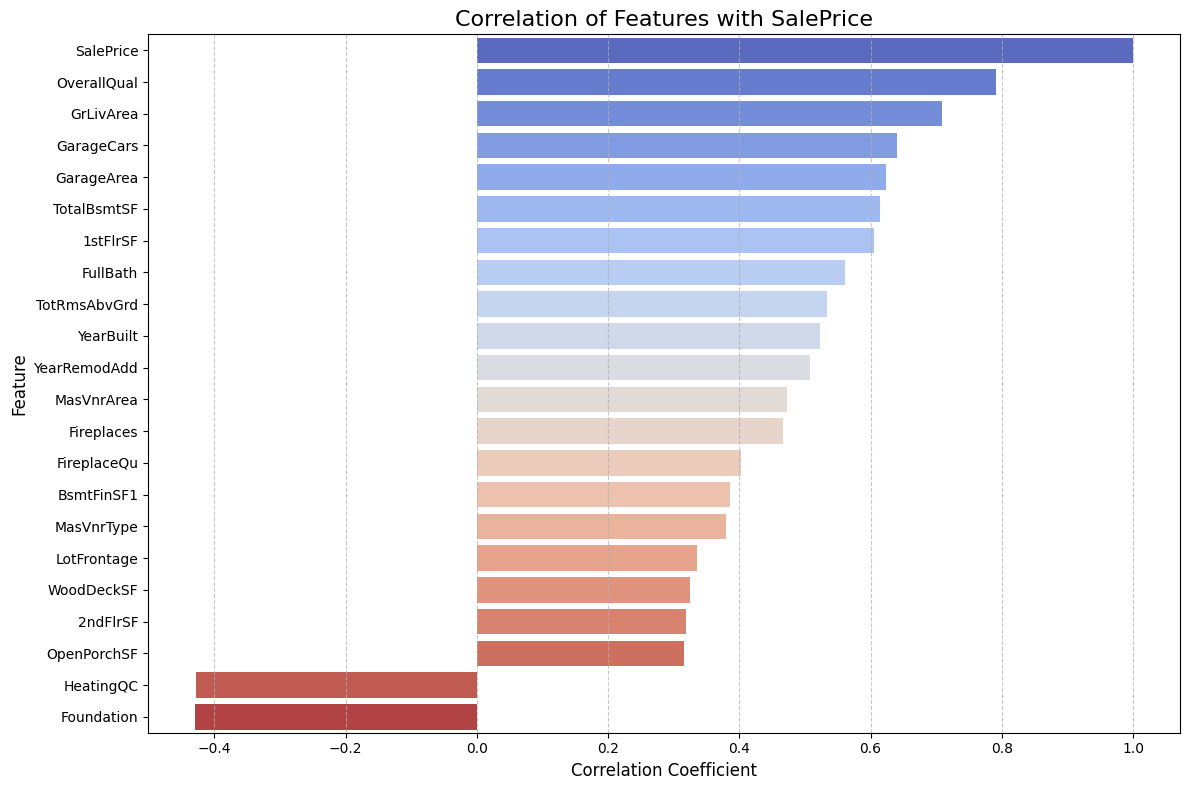

In [20]:
plt.figure(figsize=(12, 8))
sns.barplot(
    x='CorrelationWithSalePrice',
    y='Feature',
    hue='Feature',
    data=correlation_df,
    palette='coolwarm'
)
plt.title('Correlation of Features with SalePrice', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [21]:
correlation_columns=[]
for i in df_train_new.columns:
    if abs(df_train_new[i].corr(df_train_new['SalePrice']))>0.4:
        correlation_columns.append(i)
df_train_up1=df_train_new[correlation_columns]

##### Selecting features having absolute co-relation greater than 0.4 with 'SalePrice':

In [22]:
df_train_up1.head(5)

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,Foundation,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,SalePrice
0,7,2003,2003,196.0,0,856,0,856,1710,2,8,0,-1,2,548,208500
1,6,1976,1976,0.0,1,1262,0,1262,1262,2,6,1,0,2,460,181500
2,7,2001,2002,162.0,0,920,0,920,1786,2,6,1,0,2,608,223500
3,7,1915,1970,0.0,2,756,1,961,1717,1,7,1,1,3,642,140000
4,8,2000,2000,350.0,0,1145,0,1145,2198,2,9,1,0,3,836,250000


### Creating training set and training Linear Regression model:

##### Building traning set 1:

In [23]:
columns_add=['BedroomAbvGr','HalfBath','BsmtFullBath','BsmtHalfBath','2ndFlrSF']
df_train_up1.loc[:, columns_add] = df_train_new[columns_add]
df_train_up1 = df_train_up1[[col for col in df_train_up1.columns if col != 'SalePrice'] + ['SalePrice']]

In [24]:
df_train_up1.head(5)

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,Foundation,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,FullBath,...,Fireplaces,FireplaceQu,GarageCars,GarageArea,BedroomAbvGr,HalfBath,BsmtFullBath,BsmtHalfBath,2ndFlrSF,SalePrice
0,7,2003,2003,196.0,0,856,0,856,1710,2,...,0,-1,2,548,3,1,1,0,854,208500
1,6,1976,1976,0.0,1,1262,0,1262,1262,2,...,1,0,2,460,3,0,0,1,0,181500
2,7,2001,2002,162.0,0,920,0,920,1786,2,...,1,0,2,608,3,1,1,0,866,223500
3,7,1915,1970,0.0,2,756,1,961,1717,1,...,1,1,3,642,3,0,1,0,756,140000
4,8,2000,2000,350.0,0,1145,0,1145,2198,2,...,1,0,3,836,4,1,1,0,1053,250000


In [25]:
x_train_1=df_train_up1.iloc[:,:-1]
y_train_1=df_train_up1.iloc[:,-1]

##### Training model 1:

In [26]:
model1=LinearRegression()
model1.fit(x_train_1,y_train_1)

LinearRegression()

In [27]:
pred1=model1.predict(x_train_1)
print(mean_absolute_error(pred1,y_train_1))
print(mean_absolute_percentage_error(pred1,y_train_1))

22729.31758555286
0.17322981866311793


##### Plotting predictions v/s actual values for model 1:

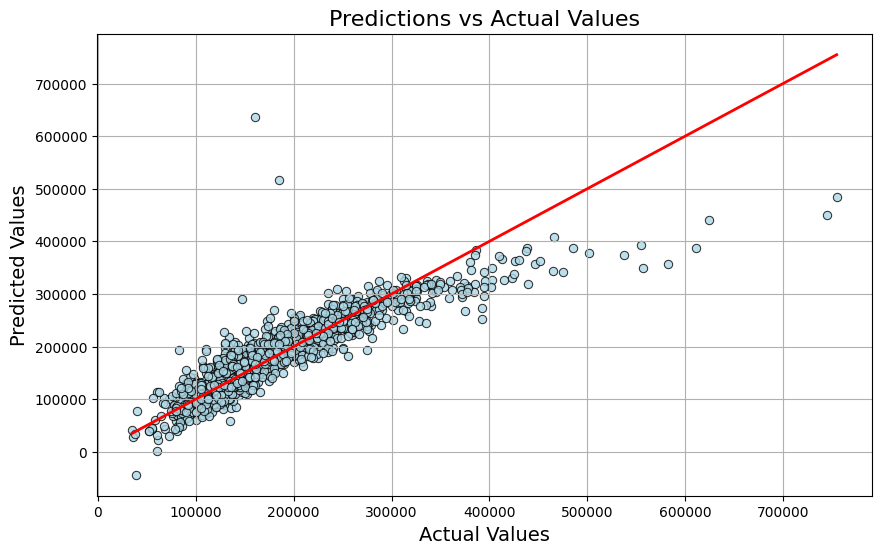

In [28]:
predictions_train1=model1.predict(x_train_1)
plt.figure(figsize=(10, 6))
plt.scatter(y_train_1, predictions_train1, alpha=0.8, color='lightblue', edgecolors='black', linewidth=0.75)
plt.plot([y_train_1.min(), y_train_1.max()], [y_train_1.min(), y_train_1.max()], color='red', linewidth=2)
plt.title('Predictions vs Actual Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.grid(True)
plt.show()

In [29]:
df_train_up2 = df_train_up1[['GrLivArea', 'BedroomAbvGr', 'SalePrice']].copy()
df_train_up2.loc[:, 'TotalBathrooms'] = df_train_up1['FullBath'] + 0.5 * df_train_up1['HalfBath'] + df_train_up1['BsmtFullBath'] + 0.5 * df_train_up1['BsmtHalfBath']

In [30]:
df_train_up2.head(5)

,GrLivArea,BedroomAbvGr,SalePrice,TotalBathrooms
0,1710,3,208500,3.5
1,1262,3,181500,2.5
2,1786,3,223500,3.5
3,1717,3,140000,2.0
4,2198,4,250000,3.5


In [31]:
df_train_up2 = df_train_up2[[col for col in df_train_up2.columns if col != 'SalePrice'] + ['SalePrice']]

##### Traning model 2:

In [32]:
x_train_2=df_train_up2.iloc[:,:-1]
y_train_2=df_train_up2.iloc[:,-1]

In [33]:
model2=LinearRegression()
model2.fit(x_train_2,y_train_2)

LinearRegression()

In [34]:
pred2=model2.predict(x_train_2)
print(mean_absolute_error(pred2,y_train_2))
print(mean_absolute_percentage_error(pred2,y_train_2))


33626.545386767146
0.1836622815325478


##### Plotting predictions v/s actual values for model 2:

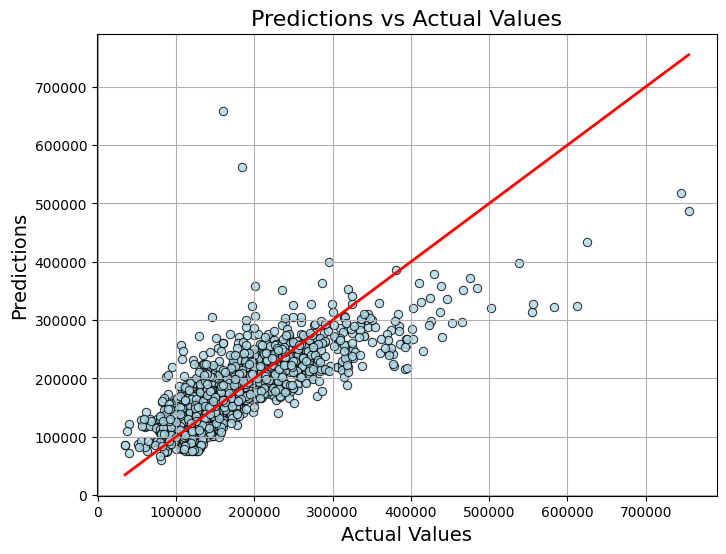

In [35]:
predictions_train2=model2.predict(x_train_2)
plt.figure(figsize=(8, 6))
plt.scatter(y_train_2, predictions_train2, alpha=0.8, color='lightblue',edgecolors='black',linewidth=0.75)
plt.plot([y_train_2.min(), y_train_2.max()], [y_train_2.min(), y_train_2.max()], color='red', linewidth=2)
plt.title('Predictions vs Actual Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.grid(True)
plt.show()


#### Note: The percentage error of model 1 and model 2 is 17.3 and 18.3 respectively.

### Reading the test dataset and preprocessing it:

In [36]:
df_test=pd.read_csv('test.csv')

In [37]:
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [38]:
df_test_new = df_test.copy()
for col in df_test_new.select_dtypes(include=['object']).columns:
    df_test_new[col] = pd.factorize(df_test_new[col])[0]

In [39]:
df_test_new.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,0,80.0,11622,0,-1,0,0,0,...,120,0,-1,0,-1,0,6,2010,0,0
1,1462,20,1,81.0,14267,0,-1,1,0,0,...,0,0,-1,-1,0,12500,6,2010,0,0
2,1463,60,1,74.0,13830,0,-1,1,0,0,...,0,0,-1,0,-1,0,3,2010,0,0
3,1464,60,1,78.0,9978,0,-1,1,0,0,...,0,0,-1,-1,-1,0,6,2010,0,0
4,1465,120,1,43.0,5005,0,-1,1,1,0,...,144,0,-1,-1,-1,0,1,2010,0,0


In [40]:
df_test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int64  
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int64  
 6   Alley          1459 non-null   int64  
 7   LotShape       1459 non-null   int64  
 8   LandContour    1459 non-null   int64  
 9   Utilities      1459 non-null   int64  
 10  LotConfig      1459 non-null   int64  
 11  LandSlope      1459 non-null   int64  
 12  Neighborhood   1459 non-null   int64  
 13  Condition1     1459 non-null   int64  
 14  Condition2     1459 non-null   int64  
 15  BldgType       1459 non-null   int64  
 16  HouseStyle     1459 non-null   int64  
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [41]:
df_test_new.columns[df_test_new.isna().any()]

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

##### Replacing NaN values by -1:

In [42]:
df_test_new[['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea']]=df_test_new[['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea']].fillna(-1)

In [43]:
df_test_new['LotFrontage']=df_test_new['LotFrontage'].fillna(df_test_new['LotFrontage'].median())

### Creating test set and predicting values based on model 1 and model 2:

##### Creating test set 1:

In [44]:
df_test_up1=df_test_new[df_train_up1.columns[:-1]]

In [45]:
df_test_up1.head(5)

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,Foundation,TotalBsmtSF,HeatingQC,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,BedroomAbvGr,HalfBath,BsmtFullBath,BsmtHalfBath,2ndFlrSF
0,5,1961,1961,0.0,0,882.0,0,896,896,1,5,0,-1,1.0,730.0,2,0,0.0,0.0,0
1,6,1958,1958,108.0,0,1329.0,0,1329,1329,1,6,0,-1,1.0,312.0,3,1,0.0,0.0,0
2,5,1997,1998,0.0,1,928.0,1,928,1629,2,6,1,0,2.0,482.0,3,1,0.0,0.0,701
3,6,1998,1998,20.0,1,926.0,2,926,1604,2,7,1,1,2.0,470.0,3,1,0.0,0.0,678
4,8,1992,1992,0.0,1,1280.0,2,1280,1280,2,5,0,-1,2.0,506.0,2,0,0.0,0.0,0


##### Predictions of test set 1 by model 1:

In [46]:
predictions1=model1.predict(df_test_up1)

##### Creating test set 2:

In [47]:
df_test_up2=df_test_new[['GrLivArea', 'BedroomAbvGr']].copy()
df_test_up2.loc[:, 'TotalBathrooms'] = df_test_new['FullBath'] + 0.5 * df_test_new['HalfBath'] + df_test_new['BsmtFullBath'] + 0.5 * df_test_new['BsmtHalfBath']

In [48]:
df_test_up2.head(5)

,GrLivArea,BedroomAbvGr,TotalBathrooms
0,896,2,1.0
1,1329,3,1.5
2,1629,3,2.5
3,1604,3,2.5
4,1280,2,2.0


##### Predictions of test set 2 by model 2:

In [49]:
predictions2=model2.predict(df_test_up2)